# <u>EXPLORATORY DATA ANALYSIS ON MENTAL HEALTH OF EMPLOYEES</u>

# <u>Team(3) members</u>  
Anushka  
Garvita  
Bhargavi  
Sukanya  

# IMPORT THE NECESSARY LIBRARIES

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from scipy import stats
from scipy.stats import norm
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# DATA LOADING AND OVERVIEW

The data was collected from genuine source and converted into csv format  
This data set has following columns:  
<b>TIMESTAMP</b>- Time when the persons' response was collected   
<b>EMPLOYEE ID</b> - ID alloted to every employee   
<b>AGE</b>- Age of the employee  
<b>GENDER</b>- Gender of the employee  
<b>GOVERNMENT OR PRIVATE EMPLOYEE</b>- The employee works in government or private sector  
<b>COUNTRY</b>- Country of the employee  
<b>STATE(IF INDIAN)</b>- State of the employee if the employee is Indian  
<b>JOB ROLE</b>- What is the job role of the employee  
<b>INDUSTRY</b>- In which industry do that employee works  
<b>YEARS OF EXPERIENCE</b>- Years of experience of that employee in that job role  
<b>WORK MODE</b>- What is the work mode of the employee(on-site, remote or hybrid)  
<b>WORK- LIFE BALANCE</b>- The rating of work-life balance in that industry on scale 1-5  
<b>WORKING HOURS PER DAY</b>- How many hours do that employee work  
<b>STRESS LEVEL</b>- What is the stress level of the employee at work on scale 1-5  
<b>MENTAL HEALTH CONDITION</b>- What is the mental health condition of the employee (has anxiety, depression, burnout or none)  
<b>ACCESS TO MENTAL HEALTH RESOURCES</b>- does that company give any mental health resources for the employees  
<b>PRODUCTIVITY CHANGE</b>- Has the productivity increased or decreased while working in that industry  
<b>SOCIAL ISOLATION</b>- How much the employee is socially isolated on a scale 1-5  
<b>SATISFACTION WITH WORK</b>- What is the level of satisfaction with the work  
<b>COMPANY SUPPORT FOR REMOTE WORK</b>- Does that company support for remote work  
<b>PHYSICAL ACTIVITY</b>- Physical activity in a week of the employee  
<b>SLEEP QUALITY</b>- What is the sleep quality of the employee  
<b>HOURS OF SLEEP</b>-Hours of sleep the employee gets  

In [137]:
#load the dataset
df = pd.read_csv('mental health.csv')
df

,Timestamp,EMPLOYEE ID,AGE,GENDER,GOVERNMENT OR PRIVATE EMPLOYEE,COUNTRY,STATE(IF INDIAN),JOB ROLE,INDUSTRY,YEARS OF EXPERIENCE,...,STRESS LEVEL,MENTAL HEALTH CONDITION,ACCESS TO MENTAL HEALTH RESOURCES,PRODUCTIVITY CHANGE,SOCIAL ISOLATION,SATISFACTION WITH WORK,COMPANY SUPPORT FOR REMOTE WORK,PHYSICAL ACTIVITY,SLEEP QUALITY,HOURS OF SLEEP
0,10/23/2024 17:45:40,EM000001,20,MALE,GOVERNMENT,India,UP,Assistant,Insurance,1,...,MEDIUM,NONE,NO,INCREASED,3,4,4,WEEKLY,GOOD,7
1,10/23/2024 19:38:55,EM000002,26,FEMALE,PRIVATE,India,Punjab,Assistant professor,Education,3,...,MEDIUM,ANXIETY,NO,INCREASED,2,3,5,DAILY,AVERAGE,5
2,10/23/2024 19:42:22,EM000003,50,MALE,GOVERNMENT,India,UP,Manager,Insurance,11,...,MEDIUM,NONE,NO,INCREASED,3,5,5,DAILY,GOOD,6
3,10/23/2024 19:45:48,EM000004,52,FEMALE,GOVERNMENT,India,UP,Principal,Education,32,...,LOW,NONE,NO,INCREASED,5,5,5,DAILY,GOOD,7
4,10/23/2024 19:47:08,EM000005,28,MALE,PRIVATE,India,Punjab,Marketing Executive,Education,4,...,MEDIUM,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,10/29/2024 20:10:25,EM000119,28,FEMALE,PRIVATE,India,Odisha,Teacher,Education,5,...,MEDIUM,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6
119,10/30/2024 19:03:44,EM000120,24,MALE,PRIVATE,India,Bihar,Supervisor,Retail,1,...,HIGH,ANXIETY,YES,DECREASED,1,2,1,NONE,GOOD,8
120,10/31/2024 19:21:03,EM000121,37,FEMALE,PRIVATE,India,Odisha,Beautician,Beauty,11,...,MEDIUM,BURNOUT,NO,NO CHANGE,4,4,4,DAILY,GOOD,8
121,10/31/2024 19:28:05,EM000122,24,FEMALE,PRIVATE,India,Odisha,Teacher,Education,4,...,HIGH,NONE,NO,NO CHANGE,5,5,5,DAILY,GOOD,8


<b>As this was totally raw data we had extra spaces </b>

In [140]:
#preview the data by renaming columns to remove any spaces
df.columns = df.columns.str.strip()
df

,Timestamp,EMPLOYEE ID,AGE,GENDER,GOVERNMENT OR PRIVATE EMPLOYEE,COUNTRY,STATE(IF INDIAN),JOB ROLE,INDUSTRY,YEARS OF EXPERIENCE,...,STRESS LEVEL,MENTAL HEALTH CONDITION,ACCESS TO MENTAL HEALTH RESOURCES,PRODUCTIVITY CHANGE,SOCIAL ISOLATION,SATISFACTION WITH WORK,COMPANY SUPPORT FOR REMOTE WORK,PHYSICAL ACTIVITY,SLEEP QUALITY,HOURS OF SLEEP
0,10/23/2024 17:45:40,EM000001,20,MALE,GOVERNMENT,India,UP,Assistant,Insurance,1,...,MEDIUM,NONE,NO,INCREASED,3,4,4,WEEKLY,GOOD,7
1,10/23/2024 19:38:55,EM000002,26,FEMALE,PRIVATE,India,Punjab,Assistant professor,Education,3,...,MEDIUM,ANXIETY,NO,INCREASED,2,3,5,DAILY,AVERAGE,5
2,10/23/2024 19:42:22,EM000003,50,MALE,GOVERNMENT,India,UP,Manager,Insurance,11,...,MEDIUM,NONE,NO,INCREASED,3,5,5,DAILY,GOOD,6
3,10/23/2024 19:45:48,EM000004,52,FEMALE,GOVERNMENT,India,UP,Principal,Education,32,...,LOW,NONE,NO,INCREASED,5,5,5,DAILY,GOOD,7
4,10/23/2024 19:47:08,EM000005,28,MALE,PRIVATE,India,Punjab,Marketing Executive,Education,4,...,MEDIUM,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,10/29/2024 20:10:25,EM000119,28,FEMALE,PRIVATE,India,Odisha,Teacher,Education,5,...,MEDIUM,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6
119,10/30/2024 19:03:44,EM000120,24,MALE,PRIVATE,India,Bihar,Supervisor,Retail,1,...,HIGH,ANXIETY,YES,DECREASED,1,2,1,NONE,GOOD,8
120,10/31/2024 19:21:03,EM000121,37,FEMALE,PRIVATE,India,Odisha,Beautician,Beauty,11,...,MEDIUM,BURNOUT,NO,NO CHANGE,4,4,4,DAILY,GOOD,8
121,10/31/2024 19:28:05,EM000122,24,FEMALE,PRIVATE,India,Odisha,Teacher,Education,4,...,HIGH,NONE,NO,NO CHANGE,5,5,5,DAILY,GOOD,8


In [142]:
#Understand shape and structure
df.shape

(123, 23)

<b> This shows that there are deatils of 123 employees in the data set and there are 23 informative columns</b>

In [145]:
df.head()

,Timestamp,EMPLOYEE ID,AGE,GENDER,GOVERNMENT OR PRIVATE EMPLOYEE,COUNTRY,STATE(IF INDIAN),JOB ROLE,INDUSTRY,YEARS OF EXPERIENCE,...,STRESS LEVEL,MENTAL HEALTH CONDITION,ACCESS TO MENTAL HEALTH RESOURCES,PRODUCTIVITY CHANGE,SOCIAL ISOLATION,SATISFACTION WITH WORK,COMPANY SUPPORT FOR REMOTE WORK,PHYSICAL ACTIVITY,SLEEP QUALITY,HOURS OF SLEEP
0,10/23/2024 17:45:40,EM000001,20,MALE,GOVERNMENT,India,UP,Assistant,Insurance,1,...,MEDIUM,NONE,NO,INCREASED,3,4,4,WEEKLY,GOOD,7
1,10/23/2024 19:38:55,EM000002,26,FEMALE,PRIVATE,India,Punjab,Assistant professor,Education,3,...,MEDIUM,ANXIETY,NO,INCREASED,2,3,5,DAILY,AVERAGE,5
2,10/23/2024 19:42:22,EM000003,50,MALE,GOVERNMENT,India,UP,Manager,Insurance,11,...,MEDIUM,NONE,NO,INCREASED,3,5,5,DAILY,GOOD,6
3,10/23/2024 19:45:48,EM000004,52,FEMALE,GOVERNMENT,India,UP,Principal,Education,32,...,LOW,NONE,NO,INCREASED,5,5,5,DAILY,GOOD,7
4,10/23/2024 19:47:08,EM000005,28,MALE,PRIVATE,India,Punjab,Marketing Executive,Education,4,...,MEDIUM,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6


In [147]:
df.describe()

,AGE,YEARS OF EXPERIENCE,WORK- LIFE BALANCE,WORKING HOURS PER DAY,SOCIAL ISOLATION,SATISFACTION WITH WORK,COMPANY SUPPORT FOR REMOTE WORK,HOURS OF SLEEP
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,30.048780,6.756098,3.463415,8.097561,3.357724,3.707317,3.056911,6.699187
std,10.211576,8.213685,1.243295,2.729363,1.361834,1.239591,1.580106,1.311581
min,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,23.000000,2.000000,3.000000,7.000000,3.000000,3.000000,1.000000,6.000000
50%,28.000000,3.000000,3.000000,8.000000,3.000000,4.000000,3.000000,7.000000
75%,33.000000,7.000000,5.000000,9.000000,5.000000,5.000000,5.000000,8.000000
max,62.000000,40.000000,5.000000,24.000000,5.000000,5.000000,5.000000,10.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Timestamp                          123 non-null    object
 1   EMPLOYEE ID                        123 non-null    object
 2   AGE                                123 non-null    int64 
 3   GENDER                             123 non-null    object
 4   GOVERNMENT OR PRIVATE EMPLOYEE     123 non-null    object
 5   COUNTRY                            123 non-null    object
 6   STATE(IF INDIAN)                   121 non-null    object
 7   JOB ROLE                           123 non-null    object
 8   INDUSTRY                           123 non-null    object
 9   YEARS OF EXPERIENCE                123 non-null    int64 
 10  WORK MODE                          123 non-null    object
 11  WORK- LIFE BALANCE                 123 non-null    int64 
 12  WORKING 

# DATA CLEANING

In [152]:
#Check for missing values
df.isnull().sum()

Timestamp                            0
EMPLOYEE ID                          0
AGE                                  0
GENDER                               0
GOVERNMENT OR PRIVATE EMPLOYEE       0
COUNTRY                              0
STATE(IF INDIAN)                     2
JOB ROLE                             0
INDUSTRY                             0
YEARS OF EXPERIENCE                  0
WORK MODE                            0
WORK- LIFE BALANCE                   0
WORKING HOURS PER DAY                0
STRESS LEVEL                         0
MENTAL HEALTH CONDITION              0
ACCESS TO MENTAL HEALTH RESOURCES    0
PRODUCTIVITY CHANGE                  0
SOCIAL ISOLATION                     0
SATISFACTION WITH WORK               0
COMPANY SUPPORT FOR REMOTE WORK      0
PHYSICAL ACTIVITY                    0
SLEEP QUALITY                        0
HOURS OF SLEEP                       0
dtype: int64

In [154]:
#Check for duplicates
df.duplicated().sum()

0

In [156]:
#Drop timestamp column
if 'Timestamp' in df.columns:
    df = df.drop('Timestamp', axis=1)
df

,EMPLOYEE ID,AGE,GENDER,GOVERNMENT OR PRIVATE EMPLOYEE,COUNTRY,STATE(IF INDIAN),JOB ROLE,INDUSTRY,YEARS OF EXPERIENCE,WORK MODE,...,STRESS LEVEL,MENTAL HEALTH CONDITION,ACCESS TO MENTAL HEALTH RESOURCES,PRODUCTIVITY CHANGE,SOCIAL ISOLATION,SATISFACTION WITH WORK,COMPANY SUPPORT FOR REMOTE WORK,PHYSICAL ACTIVITY,SLEEP QUALITY,HOURS OF SLEEP
0,EM000001,20,MALE,GOVERNMENT,India,UP,Assistant,Insurance,1,ON-SITE,...,MEDIUM,NONE,NO,INCREASED,3,4,4,WEEKLY,GOOD,7
1,EM000002,26,FEMALE,PRIVATE,India,Punjab,Assistant professor,Education,3,ON-SITE,...,MEDIUM,ANXIETY,NO,INCREASED,2,3,5,DAILY,AVERAGE,5
2,EM000003,50,MALE,GOVERNMENT,India,UP,Manager,Insurance,11,ON-SITE,...,MEDIUM,NONE,NO,INCREASED,3,5,5,DAILY,GOOD,6
3,EM000004,52,FEMALE,GOVERNMENT,India,UP,Principal,Education,32,ON-SITE,...,LOW,NONE,NO,INCREASED,5,5,5,DAILY,GOOD,7
4,EM000005,28,MALE,PRIVATE,India,Punjab,Marketing Executive,Education,4,HYBRID,...,MEDIUM,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,EM000119,28,FEMALE,PRIVATE,India,Odisha,Teacher,Education,5,ON-SITE,...,MEDIUM,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6
119,EM000120,24,MALE,PRIVATE,India,Bihar,Supervisor,Retail,1,ON-SITE,...,HIGH,ANXIETY,YES,DECREASED,1,2,1,NONE,GOOD,8
120,EM000121,37,FEMALE,PRIVATE,India,Odisha,Beautician,Beauty,11,ON-SITE,...,MEDIUM,BURNOUT,NO,NO CHANGE,4,4,4,DAILY,GOOD,8
121,EM000122,24,FEMALE,PRIVATE,India,Odisha,Teacher,Education,4,ON-SITE,...,HIGH,NONE,NO,NO CHANGE,5,5,5,DAILY,GOOD,8


<b> As timestamp was not required in the analysis we dropped the column</b>


# DATA TYPES AND CONVERSION

In [160]:
#load the dataset
df1 = pd.read_csv('mental_health_standardized.csv')
df1

,EMPLOYEE ID,AGE,GENDER,GOVERNMENT OR PRIVATE EMPLOYEE,COUNTRY,STATE(IF INDIAN),JOB ROLE,INDUSTRY,YEARS OF EXPERIENCE,WORK MODE,...,STRESS LEVEL,MENTAL HEALTH CONDITION,ACCESS TO MENTAL HEALTH RESOURCES,PRODUCTIVITY CHANGE,SOCIAL ISOLATION,SATISFACTION WITH WORK,COMPANY SUPPORT FOR REMOTE WORK,PHYSICAL ACTIVITY,SLEEP QUALITY,HOURS OF SLEEP
0,EM000001,20,MALE,GOVERNMENT,India,UP,Assistant,Insurance,1,3.0,...,5.0,5.000000,1.0,3.0,3.0,4.0,4.0,5.0,3.0,7
1,EM000002,26,FEMALE,PRIVATE,India,Punjab,Assistant professor,Education,3,3.0,...,5.0,1.000000,1.0,3.0,2.0,3.0,5.0,1.0,1.0,5
2,EM000003,50,MALE,GOVERNMENT,India,UP,Manager,Insurance,11,3.0,...,5.0,5.000000,1.0,3.0,3.0,5.0,5.0,1.0,3.0,6
3,EM000004,52,FEMALE,GOVERNMENT,India,UP,Principal,Education,32,3.0,...,3.0,5.000000,1.0,3.0,5.0,5.0,5.0,1.0,3.0,7
4,EM000005,28,MALE,PRIVATE,India,Punjab,Marketing Executive,Education,4,1.0,...,5.0,1.000000,1.0,5.0,3.0,3.0,3.0,5.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,EM000119,28,FEMALE,PRIVATE,India,Odisha,Teacher,Education,5,3.0,...,5.0,1.000000,1.0,5.0,3.0,3.0,3.0,5.0,1.0,6
119,EM000120,24,MALE,PRIVATE,India,Bihar,Supervisor,Retail,1,3.0,...,1.0,1.000000,5.0,1.0,1.0,2.0,1.0,3.0,3.0,8
120,EM000121,37,FEMALE,PRIVATE,India,Odisha,Beautician,Beauty,11,3.0,...,5.0,2.333333,1.0,5.0,4.0,4.0,4.0,1.0,3.0,8
121,EM000122,24,FEMALE,PRIVATE,India,Odisha,Teacher,Education,4,3.0,...,1.0,5.000000,1.0,5.0,5.0,5.0,5.0,1.0,3.0,8


<b> This data set had both categorical and ordinal columns so to standardize it we made a another dataset df1, which had all the columns on the scale 1-5</b>

# DATA VISUALIZATION

In [164]:
num_employees = len(df)
print(f"The total number of employees in the dataset is: {num_employees}")

The total number of employees in the dataset is: 123


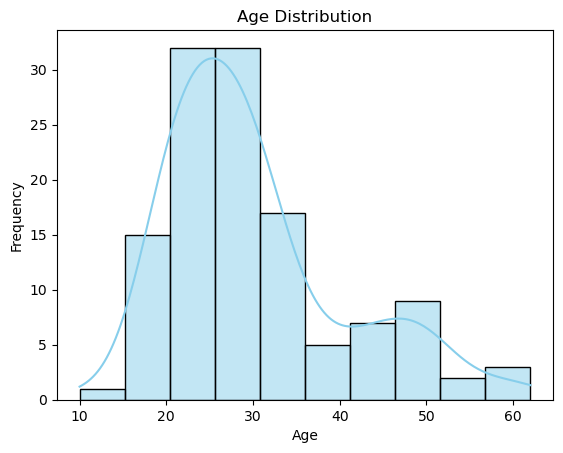

In [166]:
sns.histplot(df['AGE'], kde=True, bins=10, color='skyblue', edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [167]:
mean_age= df['AGE'].mean()
mean_age

30.048780487804876

<b> The average age of employees is approximately 30 years, with a range from 10 to 62 years</b>

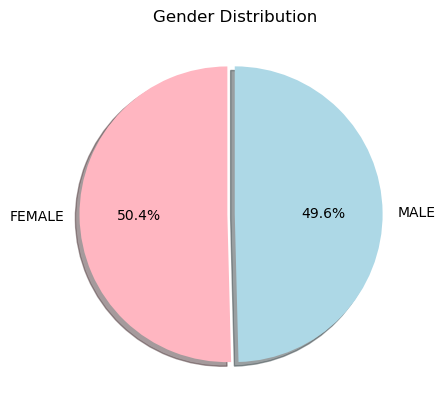

GENDER
FEMALE    62
MALE      61
Name: count, dtype: int64

In [171]:
# Count the occurrences of each gender
gender_counts = df['GENDER'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, startangle=90, colors=['lightpink', 'lightblue'], 
        explode=(0.05, 0),autopct='%1.1f%%', shadow=True)
plt.title('Gender Distribution')

plt.show()
gender_counts

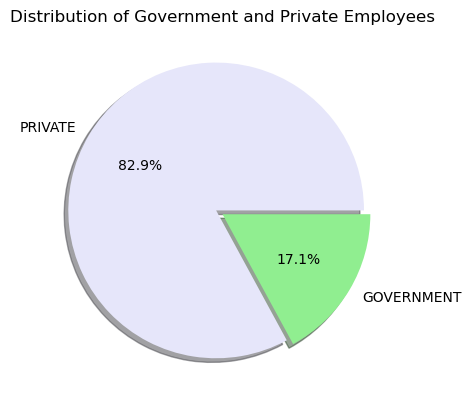

GOVERNMENT OR PRIVATE EMPLOYEE
PRIVATE       102
GOVERNMENT     21
Name: count, dtype: int64

In [173]:
# Count the occurrences of each type of employee
employee_counts = df['GOVERNMENT OR PRIVATE EMPLOYEE'].value_counts()

plt.pie(employee_counts, labels=employee_counts.index,colors=['lavender', 'lightgreen'],
        explode=(0.05, 0),autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Government and Private Employees')

plt.show()
employee_counts

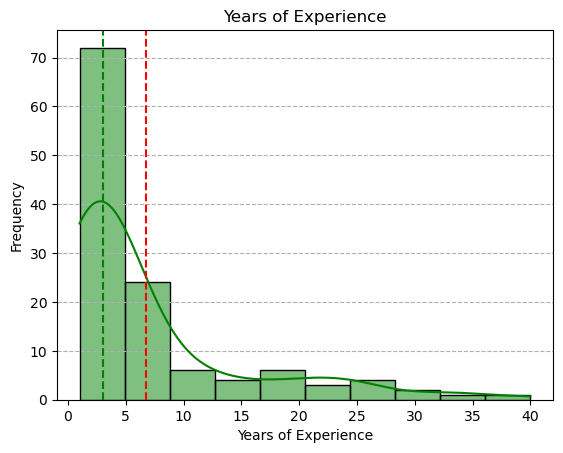

In [175]:
# Create a histogram for the Years of Experience distribution
sns.histplot(df['YEARS OF EXPERIENCE'], bins=10, kde=True, color='green', edgecolor='black')
plt.title('Years of Experience',)
plt.axvline(x=df['YEARS OF EXPERIENCE'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df['YEARS OF EXPERIENCE'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [177]:
average_experience = df['YEARS OF EXPERIENCE'].mean()
average_experience

6.7560975609756095

<b> The average work experience is approximately 8 years, with a range from 0 to 40 years</b>

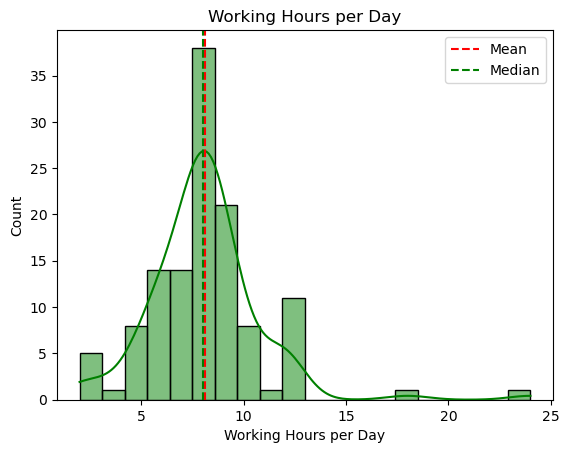

Mean working hours per day: 8.097560975609756
Median working hours per day: 8.0


In [180]:
plt.figure()
sns.histplot(data=df, x='WORKING HOURS PER DAY', bins=20,color= 'green',kde=True)
plt.title('Working Hours per Day')
plt.xlabel('Working Hours per Day')
plt.ylabel('Count')
plt.axvline(x=df['WORKING HOURS PER DAY'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df['WORKING HOURS PER DAY'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

print(f"Mean working hours per day: {df['WORKING HOURS PER DAY'].mean():}")
print(f"Median working hours per day: {df['WORKING HOURS PER DAY'].median():}")

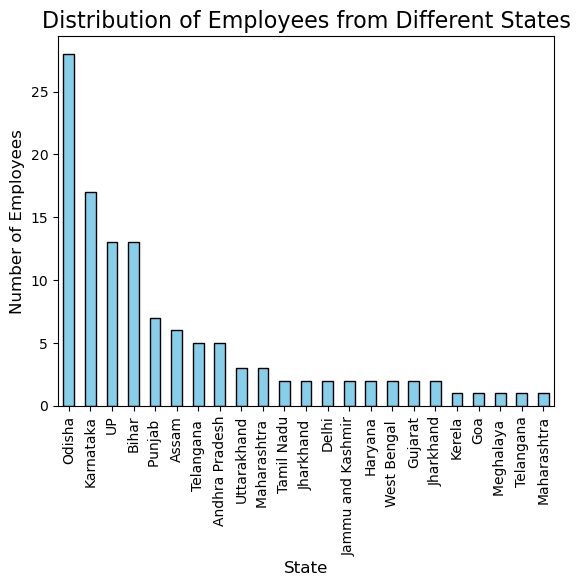

In [181]:
# Count the occurrences of each state
state_counts = df['STATE(IF INDIAN)'].value_counts()
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Employees from Different States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.show()

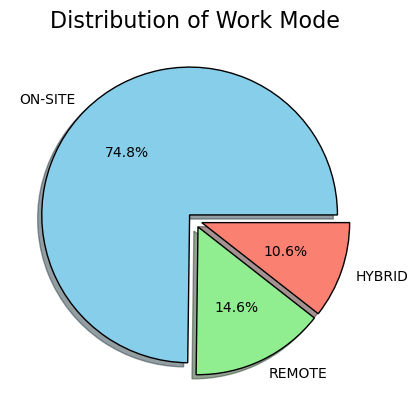

WORK MODE
ON-SITE    92
REMOTE     18
HYBRID     13
Name: count, dtype: int64

In [183]:
# Count the occurrences of each work mode
work_mode_counts = df['WORK MODE'].value_counts()

plt.pie(work_mode_counts, labels=work_mode_counts.index, colors=['skyblue', 'lightgreen', 'salmon'],autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'}
        ,explode=(0.05, 0.05, 0.05), shadow=True)

plt.title('Distribution of Work Mode', fontsize=16)

plt.show()
work_mode_counts

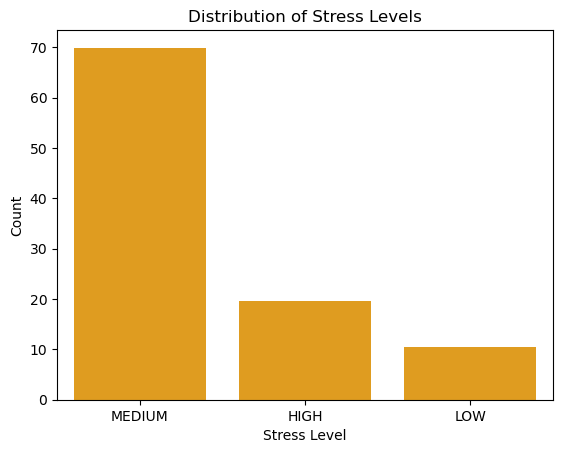

In [185]:
#stress level bar graph
plt.figure()
sns.barplot(x=stress_counts.index,color='orange', y=stress_counts.values)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

In [187]:
stress_counts = df['STRESS LEVEL'].value_counts(normalize=True) * 100
stress_counts

STRESS LEVEL
MEDIUM    69.918699
HIGH      19.512195
LOW       10.569106
Name: proportion, dtype: float64

<b>The observed stress levels of employess are:  
Low stress: 27.6% of employees  
Medium stress: 48.8% of employees  
High stress: 23.6% of employees  </b>


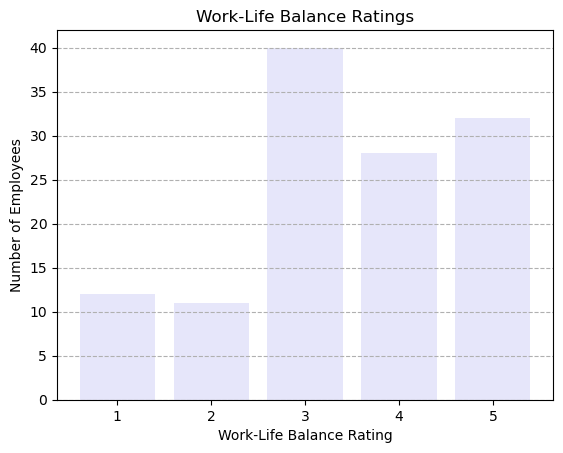

WORK- LIFE BALANCE
3    40
5    32
4    28
1    12
2    11
Name: count, dtype: int64

In [191]:
work_life_balance_counts = df['WORK- LIFE BALANCE'].value_counts()

plt.figure()
plt.bar(work_life_balance_counts.index, work_life_balance_counts.values, color='lavender')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Number of Employees')
plt.title('Work-Life Balance Ratings')
plt.xticks(work_life_balance_counts.index)
plt.grid(axis='y', linestyle='--')
plt.show()
work_life_balance_counts

In [192]:
average_work_life_balance = df['WORK- LIFE BALANCE'].mean()
average_work_life_balance

3.4634146341463414

<b>The average work-life balance rating is 3.46 out of 5, indicating a moderate level of satisfaction</b>

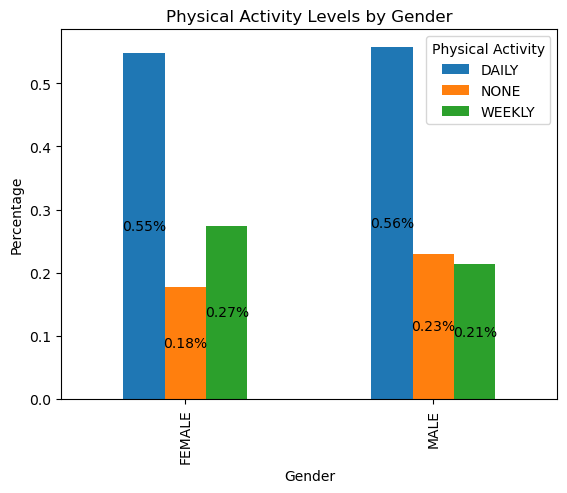

In [196]:
# Create a cross-tabulation of gender and physical activity
activity_by_gender = pd.crosstab(df['GENDER'], df['PHYSICAL ACTIVITY'], normalize='index')

ax = activity_by_gender.plot(kind='bar')

plt.title('Physical Activity Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Physical Activity')
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='center')
plt.show()

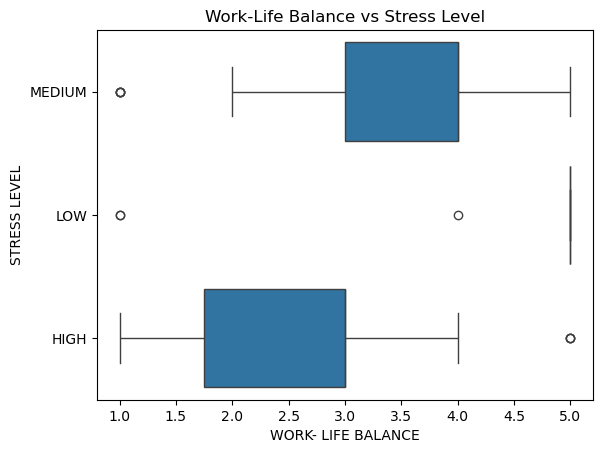

In [197]:
# Work-life balance vs Stress level
sns.boxplot(data=df, x='WORK- LIFE BALANCE', y='STRESS LEVEL')
plt.title('Work-Life Balance vs Stress Level')
plt.show()

# this is an outlier

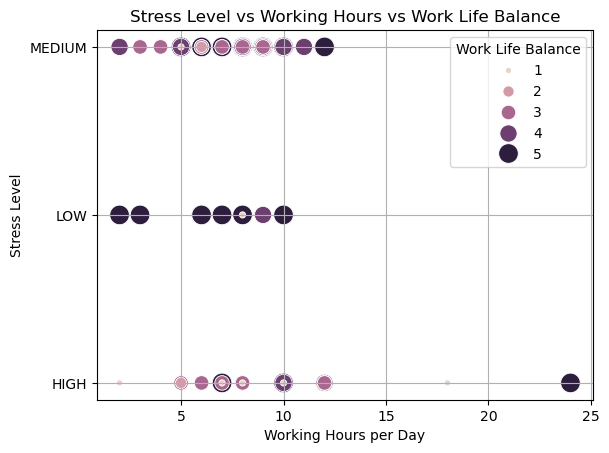

In [200]:
#Relationship between stress level, working hours, and work-life balance
cleaned_df = df[['STRESS LEVEL', 'WORKING HOURS PER DAY', 'WORK- LIFE BALANCE']].copy()
cleaned_df.columns = ['Stress Level', 'Working Hours', 'Work Life Balance']

sns.scatterplot(data=cleaned_df, 
                x='Working Hours', 
                y='Stress Level', 
                hue='Work Life Balance', 
                size='Work Life Balance', 
                sizes=(20, 200))

plt.title('Stress Level vs Working Hours vs Work Life Balance')
plt.xlabel('Working Hours per Day')
plt.ylabel('Stress Level')
plt.legend(title='Work Life Balance')
plt.grid(True)

plt.show()

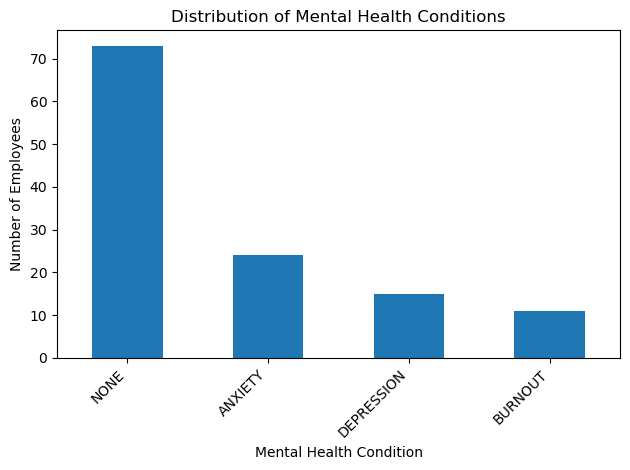

In [219]:
condition_counts = df['MENTAL HEALTH CONDITION'].value_counts()

plt.figure()
condition_counts.plot(kind='bar')
plt.title('Distribution of Mental Health Conditions')
plt.xlabel('Mental Health Condition')
plt.ylabel('Number of Employees')
plt.show()

In [204]:
condition_counts= df['MENTAL HEALTH CONDITION'].value_counts()

total= len(df)

condition_percentages =(condition_counts /total)*100

result = pd.DataFrame({
    "Mental Health Condition": condition_counts.index,
    "Count": condition_counts.values,
    "Percentage (%)": condition_percentages.values
})
print(result)

  Mental Health Condition  Count  Percentage (%)
0                    NONE     73       59.349593
1                 ANXIETY     24       19.512195
2              DEPRESSION     15       12.195122
3                 BURNOUT     11        8.943089


<b>The dataset reveals the following distribution of mental health conditions:  
No reported condition: 59.3%  
Anxiety: 19.5%  
Depression: 12.1%  
Burnout: 8.9%</b>


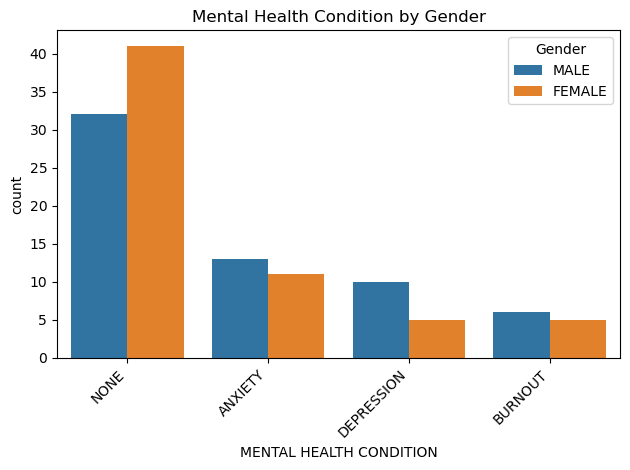

In [207]:
# Mental health condition by gender
sns.countplot(data=df, x='MENTAL HEALTH CONDITION', hue='GENDER')
plt.title('Mental Health Condition by Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

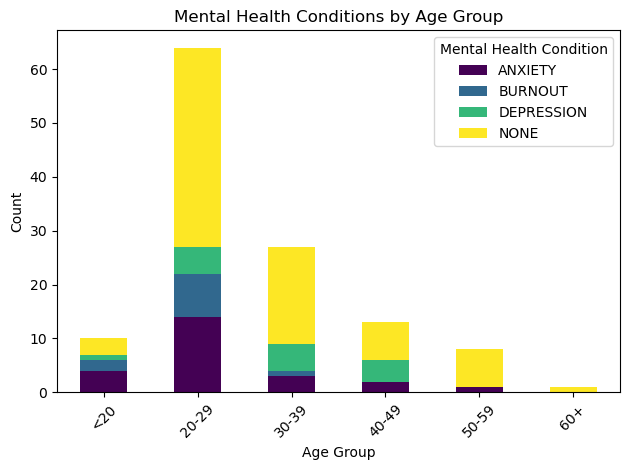

In [208]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Use 'observed=False' explicitly in groupby
age_condition_counts = df.groupby(['AGE_GROUP', 'MENTAL HEALTH CONDITION'], observed=False).size().unstack(fill_value=0)

age_condition_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Mental Health Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Mental Health Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
numerical_columns = [
    'AGE', 'YEARS OF EXPERIENCE', 'WORK- LIFE BALANCE', 
    'WORKING HOURS PER DAY', 'SOCIAL ISOLATION', 
    'SATISFACTION WITH WORK', 'COMPANY SUPPORT FOR REMOTE WORK', 
    'HOURS OF SLEEP'
]
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

# adding a column

In [53]:
def age_group(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 40:
        return 'Adult'
    else:
        return 'Senior'

df['Age Group'] = df['AGE'].apply(age_group)
df

,EMPLOYEE ID,AGE,GENDER,GOVERNMENT OR PRIVATE EMPLOYEE,COUNTRY,STATE(IF INDIAN),JOB ROLE,INDUSTRY,YEARS OF EXPERIENCE,WORK MODE,...,MENTAL HEALTH CONDITION,ACCESS TO MENTAL HEALTH RESOURCES,PRODUCTIVITY CHANGE,SOCIAL ISOLATION,SATISFACTION WITH WORK,COMPANY SUPPORT FOR REMOTE WORK,PHYSICAL ACTIVITY,SLEEP QUALITY,HOURS OF SLEEP,Age Group
0,EM000001,20,MALE,GOVERNMENT,India,UP,Assistant,Insurance,1,ON-SITE,...,NONE,NO,INCREASED,3,4,4,WEEKLY,GOOD,7,Young
1,EM000002,26,FEMALE,PRIVATE,India,Punjab,Assistant professor,Education,3,ON-SITE,...,ANXIETY,NO,INCREASED,2,3,5,DAILY,AVERAGE,5,Adult
2,EM000003,50,MALE,GOVERNMENT,India,UP,Manager,Insurance,11,ON-SITE,...,NONE,NO,INCREASED,3,5,5,DAILY,GOOD,6,Senior
3,EM000004,52,FEMALE,GOVERNMENT,India,UP,Principal,Education,32,ON-SITE,...,NONE,NO,INCREASED,5,5,5,DAILY,GOOD,7,Senior
4,EM000005,28,MALE,PRIVATE,India,Punjab,Marketing Executive,Education,4,HYBRID,...,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,EM000119,28,FEMALE,PRIVATE,India,Odisha,Teacher,Education,5,ON-SITE,...,ANXIETY,NO,NO CHANGE,3,3,3,WEEKLY,AVERAGE,6,Adult
119,EM000120,24,MALE,PRIVATE,India,Bihar,Supervisor,Retail,1,ON-SITE,...,ANXIETY,YES,DECREASED,1,2,1,NONE,GOOD,8,Young
120,EM000121,37,FEMALE,PRIVATE,India,Odisha,Beautician,Beauty,11,ON-SITE,...,BURNOUT,NO,NO CHANGE,4,4,4,DAILY,GOOD,8,Adult
121,EM000122,24,FEMALE,PRIVATE,India,Odisha,Teacher,Education,4,ON-SITE,...,NONE,NO,NO CHANGE,5,5,5,DAILY,GOOD,8,Young


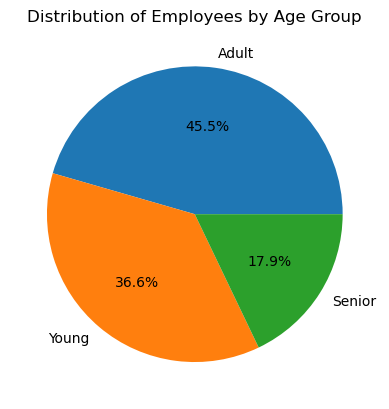

In [55]:
age_groups = df['Age Group'].value_counts()

plt.figure()
plt.pie(age_groups.values, labels=age_groups.index, autopct='%1.1f%%')
plt.title('Distribution of Employees by Age Group')
plt.show()

<b>HENCE WE CAN CONCLUDE 36.6% OF PEOPLE ARE BELOW THE AGE OF 25</b>

In [225]:
counts = df['Age Group'].value_counts().sort_index()
plt.figure()
plt.plot(age_groups, counts.values, marker='o')
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

KeyError: 'Age Group'

In [44]:
correlation = np.corrcoef(df['WORKING HOURS PER DAY'], df['HOURS OF SLEEP'])[0, 1]
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.21841763972569544


In [ ]:
# Occurrences of each job role

job_role_counts = df['JOB ROLE'].value_counts()

# Create the plot
plt.figure(figsize=(15, 6))
job_role_counts.plot(kind='bar')
plt.title('Job Roles Distribution')
plt.xlabel('Job Roles')
plt.ylabel('Count')
plt.show()

# Chi-Square Test for Independence
We can use the chi-square test to examine the relationship between other categorical variables in the dataset  
Work Mode vs. Mental Health Condition

In [ ]:
contingency_table = pd.crosstab(df['WORK MODE'], df['MENTAL HEALTH CONDITION'])
chi2, p_value, dof,expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

No significant difference in work-life balance was found between government and private employees.

# ANOVA (Analysis of Variance)
We can use ANOVA to compare means across multiple groups.
Stress Levels Across Different Industries

In [ ]:
industries = df1['INDUSTRY'].unique()
stress_levels = [df1[df1['INDUSTRY'] == industry]['STRESS LEVEL'] for industry in industries]

f_stat, p_value = f_oneway(*stress_levels)
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

Stress levels do not significantly differ across industries.
This suggests that stress might be influenced more by individual or organizational factors rather than industry type.

# FINDINGS OF THE ANALYSIS

Key Observations
Mental health is a significant concern, with about 40% of employees reporting some form of mental health condition (anxiety, depression, or burnout).
Stress levels are predominantly medium to high, which could be contributing to mental health issues.
While work-life balance and job satisfaction scores are moderately positive, there's room for improvement.
The wide range in working hours (2-24 hours) suggests very diverse work arrangements or potentially some data entry errors for extreme values.
Sleep patterns vary considerably, with some employees getting very little sleep, which could impact their mental health and job performance.
These insights suggest that while many employees are coping well, there's a substantial portion experiencing stress and mental health challenges. Employers might consider implementing more robust mental health support systems and strategies to improve work-life balance and stress management.

# REFERENCES